In [2]:
import importlib
import data_generation
import feature_distribution
import matplotlib.pyplot as plt
import classification
import pandas as pd

In [20]:
importlib.reload(data_generation)

dataset = data_generation.generate_dataset(100000, min_nodes=20, max_nodes=30)

In [21]:
importlib.reload(data_generation)
data_generation.save_dataset(dataset)

In [8]:
importlib.reload(classification)
feature_train, feature_test, chordal_train, chordal_test = classification.preprocessing(dataset)

In [4]:
importlib.reload(data_generation)
dataset = data_generation.load_datasets()

In [5]:
len(dataset)

600000

In [9]:
lr_clf = classification.logistic_regression(feature_train, chordal_train, X_test = feature_test, y_test = chordal_test)
knn_clf = classification.K_nearest_neighbour(feature_train, chordal_train, X_test = feature_test, y_test = chordal_test)
svm_clf = classification.support_vector_machine(feature_train, chordal_train, X_test = feature_test, y_test = chordal_test)
tree_clf = classification.decision_tree(feature_train, chordal_train, X_test = feature_test, y_test = chordal_test)
rf_clf = classification.random_forrest(feature_train, chordal_train, X_test = feature_test, y_test = chordal_test)
xgb_clf = classification.xgboost(feature_train, chordal_train, X_test = feature_test, y_test = chordal_test)

models_list = [lr_clf, knn_clf, svm_clf, tree_clf, rf_clf, xgb_clf]

c:\Users\abhik\Anaconda\lib\site-packages\xgboost\core.py:158: UserWarning: [15:47:39] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.



In [10]:
importlib.reload(classification)
comparison = classification.compare_models(feature_train, chordal_train, feature_test, chordal_test, models = models_list)
comparison

,Model,Train Accuracy,Test Accuracy,Difference
0,LogisticRegression(solver='liblinear'),97.92,97.87,0.04
1,KNeighborsClassifier(),99.37,99.20,0.17
2,SVC(gamma=0.1),99.24,99.24,0.01
3,DecisionTreeClassifier(random_state=42),99.67,99.29,0.37
4,"RandomForestClassifier(n_estimators=1000, rand...",99.67,99.37,0.30
5,"XGBClassifier(base_score=None, booster=None, c...",99.49,99.38,0.10


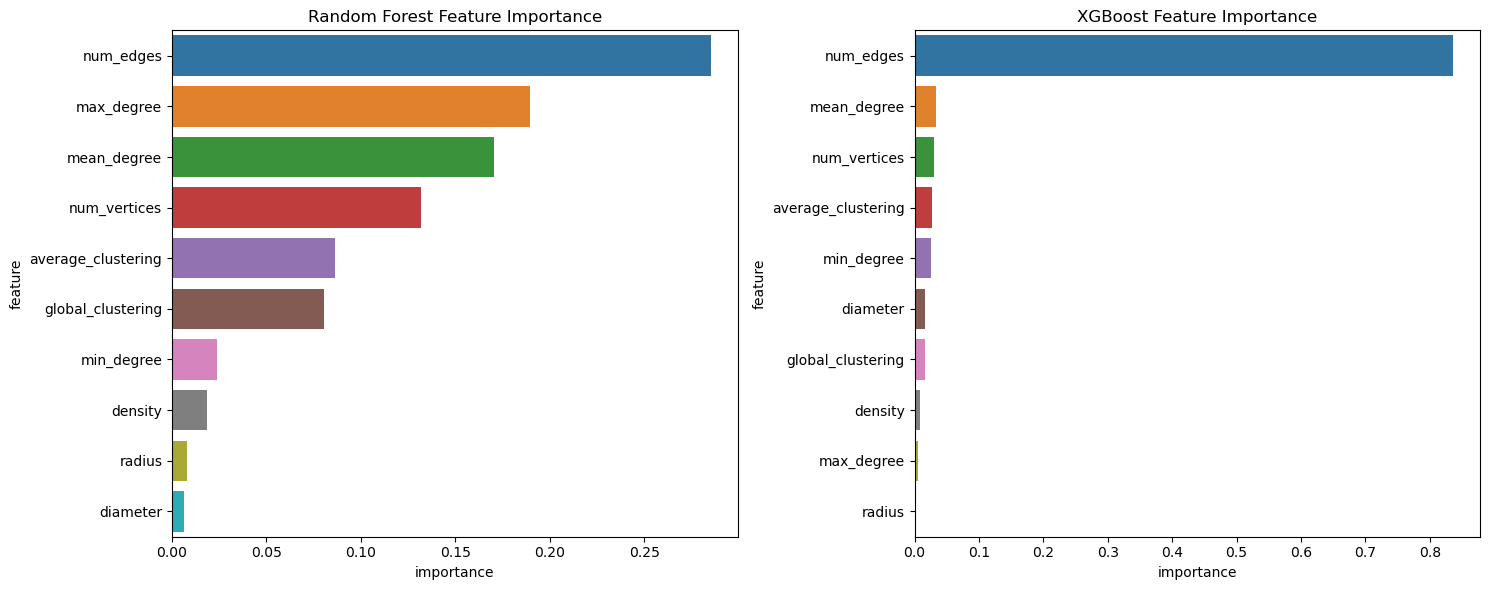

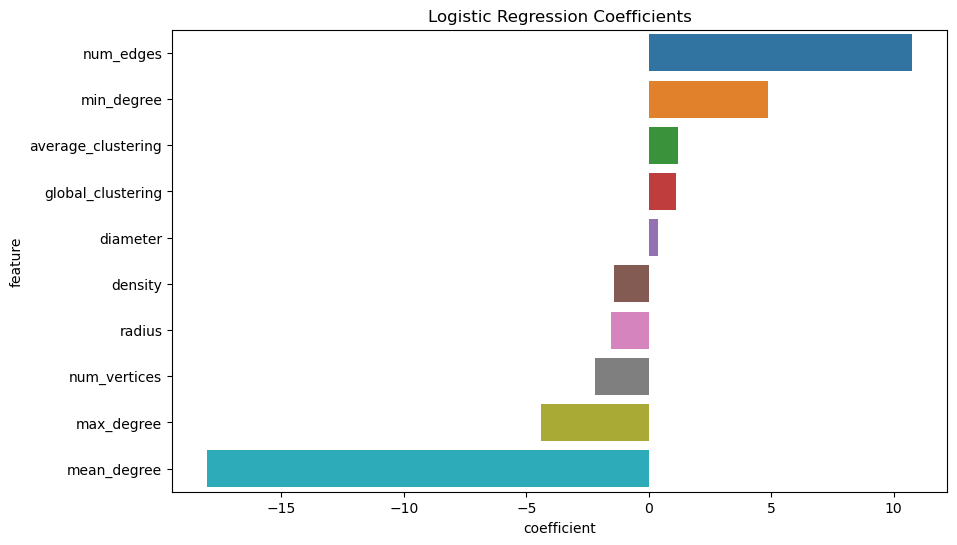

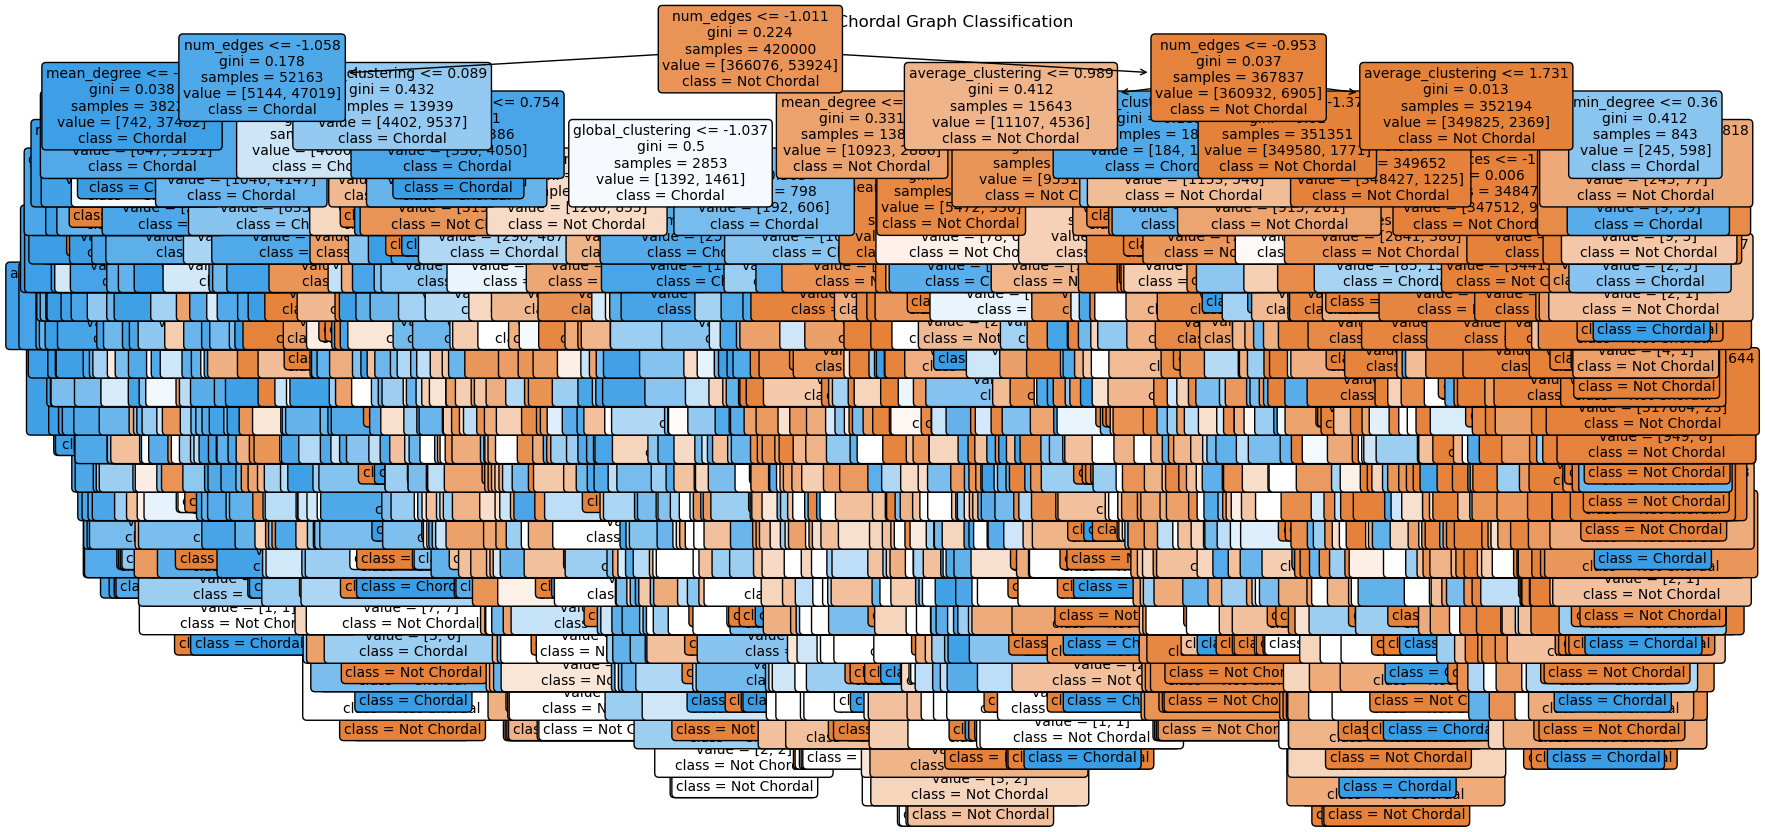

In [11]:
rf_importance, xgb_importance = classification.plot_feature_importance(feature_train, chordal_train, rf = rf_clf, xgb = xgb_clf)
lr_coefficients = classification.plot_logistic_coefficients(feature_train, chordal_train, lr = lr_clf)
tree_clf = classification.visualize_decision_tree(feature_train, chordal_train, tree_clf = tree_clf)
plt.show()

In [6]:
importlib.reload(feature_distribution)
corr = feature_distribution.correlation(dataset)
plt.show()

KeyError: 0

In [13]:
importlib.reload(feature_distribution)
# Select features to visualize
selected_features = ['density', 'global_clustering', 'average_clustering']
    
# Create and show the plots
fig = feature_distribution.visualise(dataset, selected_features)
plt.show()

ValueError: too many values to unpack (expected 2)